# Explore here

In [45]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from dotenv import load_dotenv
load_dotenv()
import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

wknd_uri = "spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spoti = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Obtiene la información del artista
wknd_info = spoti.artist(wknd_uri)

top_tracks = spoti.artist_top_tracks(wknd_uri)

print(f'Canciones populares de {wknd_info["name"]}:')

name = []
minutes = []
popularity = []

# for track in top_tracks['tracks']:
#     print('track     : ' + track['name'])
#     print('duration  : ' + str(track['duration_ms']))
#     print('popularity: ' + str(track['popularity']))
#     print('-------------------------')

for track in top_tracks['tracks']:
    name.append(track['name'])
    duracion_en_minutos = round(track['duration_ms']/ 60000, 2)
    minutes.append(duracion_en_minutos)
    popularity.append(track['popularity'])
    print('track     : ' + track['name'])
    print('duration  : ' + str(duracion_en_minutos))
    print('popularity: ' + str(track['popularity']))
    print('----------------------------------')


Canciones populares de The Weeknd:
track     : Starboy
duration  : 3.84
popularity: 94
----------------------------------
track     : Die For You
duration  : 4.34
popularity: 91
----------------------------------
track     : Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series
duration  : 3.59
popularity: 93
----------------------------------
track     : Creepin' (with The Weeknd & 21 Savage)
duration  : 3.69
popularity: 92
----------------------------------
track     : Blinding Lights
duration  : 3.33
popularity: 92
----------------------------------
track     : Stargirl Interlude
duration  : 1.86
popularity: 88
----------------------------------
track     : Die For You (with Ariana Grande) - Remix
duration  : 3.88
popularity: 84
----------------------------------
track     : One Of The Girls (with JENNIE, Lily Rose Depp)
duration  : 4.08
popularity: 90
----------------------------------
track     : Save Your Tears
duration  : 3.59
popularity: 89
---------------

In [46]:
import pandas as pd

wknd_ = pd.DataFrame({'Track': name, 'Minutes': minutes, 'popularity': popularity})
wknd_.sort_values(by='popularity',  inplace = True,  ascending=False)
wknd_.head(3)

,Track,Minutes,popularity
0,Starboy,3.84,94
2,Popular (with Playboi Carti & Madonna) - Music...,3.59,93
3,Creepin' (with The Weeknd & 21 Savage),3.69,92


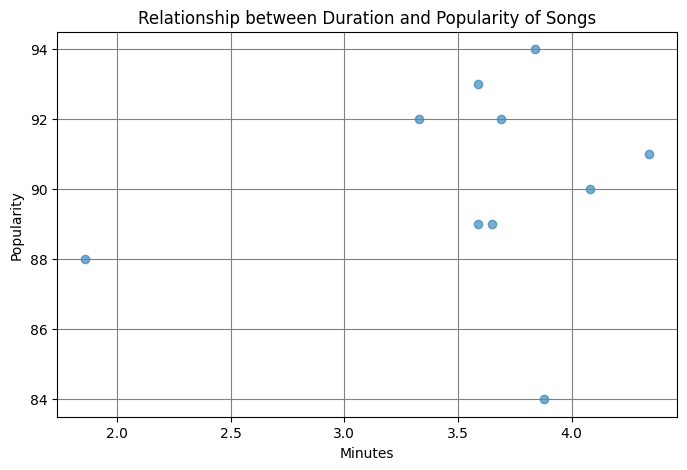

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(wknd_['Minutes'], wknd_['popularity'], alpha=0.6)
plt.title('Relationship between Duration and Popularity of Songs')
plt.xlabel('Minutes')
plt.ylabel('Popularity')
plt.grid(True, color = 'gray', linewidth=0.8)
plt.show()